In [ ]:
#importing tensorflow libraries for dataset, layers and model
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
"""
    Function to build a convolutional neural network (CNN) model for digit classification.

    Parameters:
        input_shape (tuple): The shape of the input images. Default is (28, 28, 1) for grayscale images.

    Returns:
        tf.keras.Model: The constructed CNN model.
"""
def build_model(input_shape=(28, 28, 1)):
   # Convolutional layers
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        # Fully connected layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
     # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
"""
    Function to train the CNN model on the given dataset.

    Parameters:
        model (tf.keras.Model): The CNN model to train.
        train_images (numpy.ndarray): The training images.
        train_labels (numpy.ndarray): The training labels.
        test_images (numpy.ndarray): The test images.
        test_labels (numpy.ndarray): The test labels.
        epochs (int): Number of epochs for training. Default is 5.
        batch_size (int): Batch size for training. Default is 32.
"""
def train_model(model, train_images, train_labels, test_images, test_labels, epochs=5, batch_size=32):
      # Preprocess the data
    train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
    train_images = train_images.astype('float32') / 255
    test_images = test_images.astype('float32') / 255
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    # Train and fit the model
    model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

In [ ]:
"""Function to evaluate the trained CNN model on the test set.

    Parameters:
        model (tf.keras.Model): The trained CNN model.
        test_images (numpy.ndarray): The test images.
        test_labels (numpy.ndarray): The test labels.
"""
 # Preprocess the test data
def evaluate_model(model, test_images, test_labels):
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
    test_images = test_images.astype('float32') / 255
    test_labels = to_categorical(test_labels)

    _, accuracy = model.evaluate(test_images, test_labels)
    print('Test accuracy:', accuracy)


In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



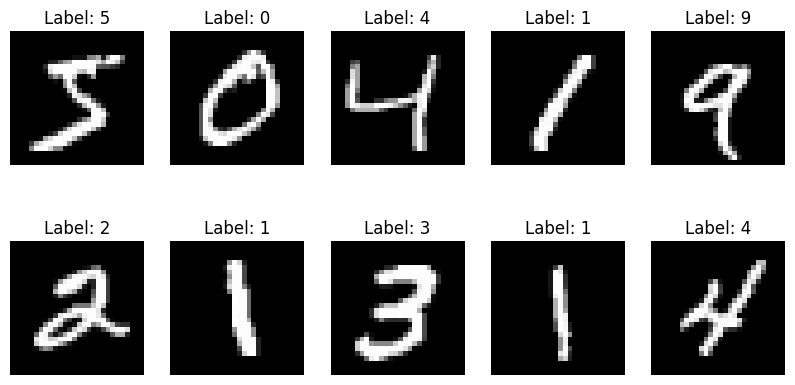

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# Reshape and preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# Build the model
model = build_model()

# Train the model
train_model(model, train_images, train_labels, test_images, test_labels, epochs=5, batch_size=32)

# Evaluate the model
evaluate_model(model, test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.7662 - accuracy: 0.7357 - val_loss: 0.2417 - val_accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1987 - accuracy: 0.9385 - val_loss: 0.1281 - val_accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1368 - accuracy: 0.9574 - val_loss: 0.1122 - val_accuracy: 0.9631
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1069 - accuracy: 0.9666 - val_loss: 0.0915 - val_accuracy: 0.9715
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0672 - accuracy: 0.9795
Test accuracy: 0.9794999957084656
